In [282]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [283]:
data = pd.read_csv(r"C:\Users\kisho\DataScience\Machine Learning\Practice\cat1.csv")

In [284]:
data.head()

,Unnamed: 0,from_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_datee,booking_month,weekend,timeOfDay,timeDifference,cancel_zone
0,6,15.0,0,0,0,1,1,0,2,0,1
1,17,15.0,1,0,0,12,1,1,1,-4,0
2,24,15.0,0,0,0,5,1,1,1,-6,0
3,158,1.0,1,0,0,4,1,0,2,-3,0
4,216,15.0,1,0,0,6,1,1,1,-2,0


In [285]:
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

,from_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_datee,booking_month,weekend,timeOfDay,timeDifference,cancel_zone
0,15.0,0,0,0,1,1,0,2,0,1
1,15.0,1,0,0,12,1,1,1,-4,0
2,15.0,0,0,0,5,1,1,1,-6,0


In [286]:
data.shape

(1589, 10)

In [287]:
data.columns

Index(['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],
      dtype='object')

In [288]:
names =['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],

dx = ['Cancel', 'notCancel']

In [289]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[ 15.,   0.,   0., ...,   2.,   0.,   1.],
       [ 15.,   1.,   0., ...,   1.,  -4.,   0.],
       [ 15.,   0.,   0., ...,   1.,  -6.,   0.],
       ...,
       [ 15.,   1.,   0., ...,   1., -16.,   0.],
       [ 15.,   0.,   0., ...,   2.,   3.,   1.],
       [ 15.,   0.,   0., ...,   3.,   4.,   0.]])

In [290]:
y = data.Car_Cancellation.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [291]:
print("Shape of features set X: ",X.shape)
print("Shape of target Y: ",y.shape)

Shape of features set X:  (1589, 9)
Shape of target Y:  (1589,)


In [292]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [293]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (953, 9)
Data of testing features:  (636, 9)


Data of training target:  (953,)
Data of testing target:  (636,)


In [294]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [295]:
x_train

array([[ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
         0.32403891, -0.78483716],
       [ 0.23792135,  1.16823126, -0.14262753, ...,  0.57456113,
         0.05362816, -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ...,  1.79270743,
         1.27047656, -0.78483716],
       ...,
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
        -0.2167826 , -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.03451201,
        -0.62239874, -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
        -0.48719336, -0.78483716]])

In [296]:
x_test

array([[ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -0.55584048, -0.77395236],
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -1.22284905,  1.22699765],
       [ 4.48279419, -0.87559504,  7.53778361, ..., -0.6764421 ,
        -0.02223362, -0.77395236],
       ...,
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.10661803,
         1.17838181, -0.77395236],
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -0.28903705, -0.77395236],
       [ 0.24251592,  1.14208048, -0.13266499, ..., -0.6764421 ,
        -1.08944733, -0.77395236]])

In [297]:
#Model 1 - Logistic Regression
model_logreg = LogisticRegression(random_state=0)
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [298]:
y_pred = model_logreg.predict(x_test)
y_pred[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [299]:
y_test[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [300]:
conf_matrix_logreg = confusion_matrix(y_test,y_pred)
conf_matrix_logreg

array([[629,   0],
       [  5,   2]], dtype=int64)

<Axes: >

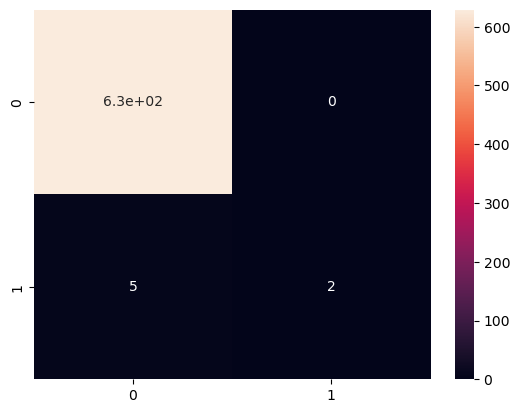

In [301]:
sns.heatmap(conf_matrix_logreg,annot=True)

In [302]:
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9921383647798742

In [303]:
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

1.0

In [304]:
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.2857142857142857

In [305]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
auc_logreg = metrics.roc_auc_score(y_test,y_pred_proba)
auc_logreg

0.9266409266409267

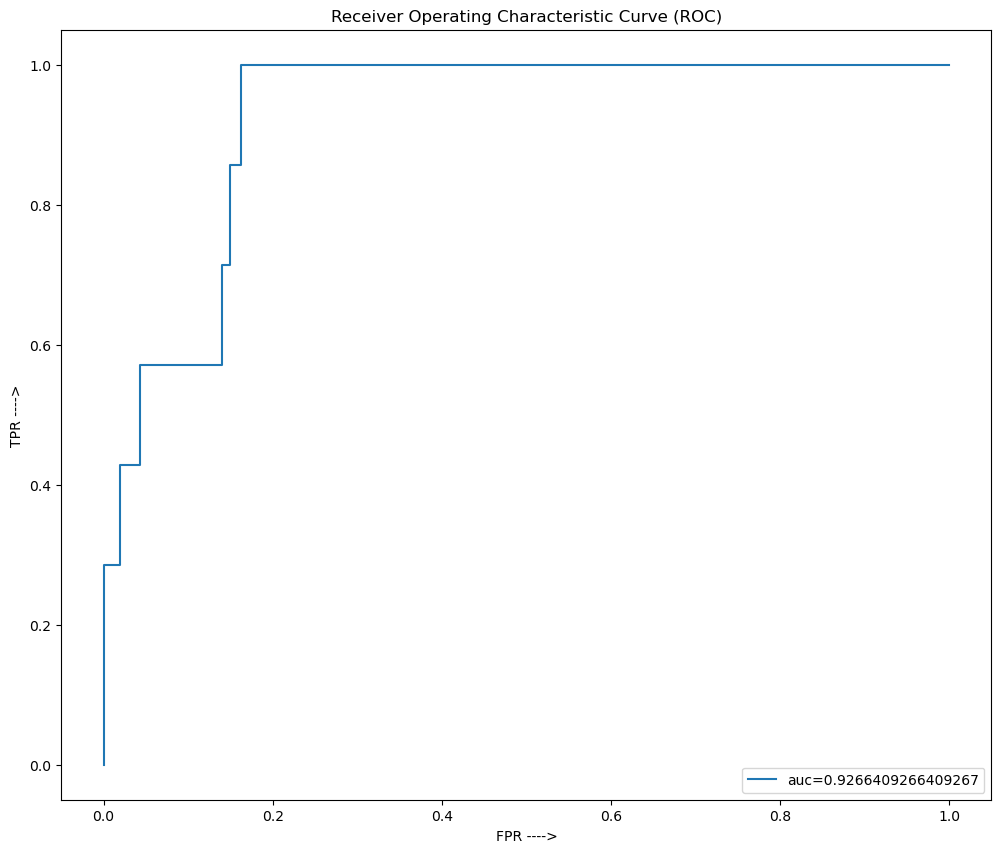

In [306]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [307]:
model_dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt2.fit(x_train,y_train)

model_dt2_score_train = model_dt2.score(x_train,y_train)

model_dt2_score_test = model_dt2.score(x_test,y_test)

print('Training Score',model_dt2_score_train)

print('Testing Score',model_dt2_score_test)

Training Score 0.9863588667366212
Testing Score 0.9874213836477987


In [308]:
model_dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt4.fit(x_train,y_train)

model_dt4_score_train = model_dt4.score(x_train,y_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)

print('Training Score',model_dt4_score_train)

print('Testing Score',model_dt4_score_test)

Training Score 0.9884575026232949
Testing Score 0.9827044025157232


In [309]:
model_dt6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt6.fit(x_train,y_train)

model_dt6_score_train = model_dt6.score(x_train,y_train)

model_dt6_score_test = model_dt6.score(x_test,y_test)

print('Training Score',model_dt6_score_train)

print('Testing Score',model_dt6_score_test)

Training Score 0.9958027282266527
Testing Score 0.9858490566037735


In [310]:
model_dt8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt8.fit(x_train,y_train)

model_dt8_score_train = model_dt8.score(x_train,y_train)

model_dt8_score_test = model_dt8.score(x_test,y_test)

print('Training Score',model_dt8_score_train)

print('Testing Score',model_dt8_score_test)

Training Score 0.9989506820566632
Testing Score 0.9842767295597484


In [311]:
model_dt4 = DecisionTreeClassifier(max_depth=4,criterion='entropy')

model_dt4.fit(x_train,y_train)

y_pred_dt4 = model_dt4.predict(x_test)
y_pred_proba_dt4 = model_dt4.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt4_score_train = model_dt4.score(x_train,y_train)
print(model_dt4_score_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)
print(model_dt4_score_test)

0.9853095487932844
0.9889937106918238


In [312]:
y_pred_dt4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [313]:
predictions = model_dt4.predict(x_test)
print(model_dt4.score(x_test,y_test))
y_actual_result = y_test[0]

0.9889937106918238


In [314]:
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt4)
conf_matrix_dt

array([[629,   0],
       [  7,   0]], dtype=int64)

<Axes: >

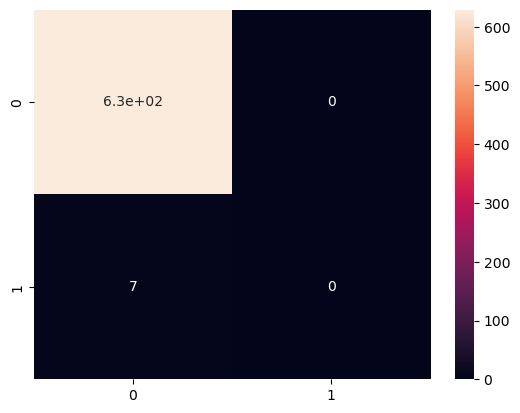

In [315]:
sns.heatmap(conf_matrix_dt,annot=True)

In [316]:
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt4)
accuracy_dt

0.9889937106918238

In [317]:
precision_dt = metrics.precision_score(y_test,y_pred_dt4)
precision_dt

0.0

In [318]:
recall_dt = metrics.recall_score(y_test,y_pred_dt4)
recall_dt

0.0

In [319]:
y_pred_proba = model_dt4.predict_proba(x_test)[::,1]
auc_dt = metrics.roc_auc_score(y_test,y_pred_proba)
auc_dt

0.6804451510333863

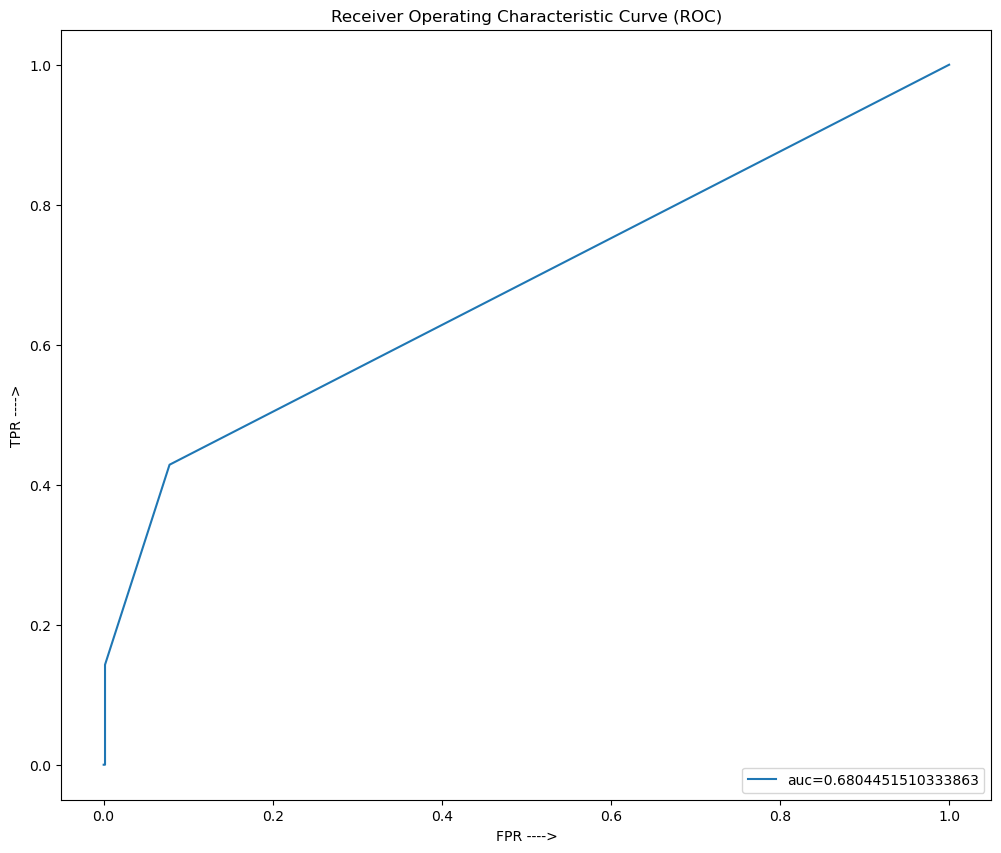

In [320]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [321]:
#Random forest classifier
data.columns

Index(['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],
      dtype='object')

In [322]:
names = ['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone']

dx = ['Cancel', 'NotCancel']

In [323]:
names_index = names[2:]

In [324]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=40)

In [325]:
fit_rf = RandomForestClassifier(random_state=40)

In [326]:
np.random.seed(40)
start = time.time()

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(x_train,y_train)

print('Best Parameters using Grid search: \n',cv_rf.best_params_)

end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search: 34.29


In [327]:
fit_rf.set_params(criterion='gini',max_features = None,max_depth = 2)

RandomForestClassifier(max_depth=2, max_features=None, random_state=40)

In [328]:
#oob
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [329]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

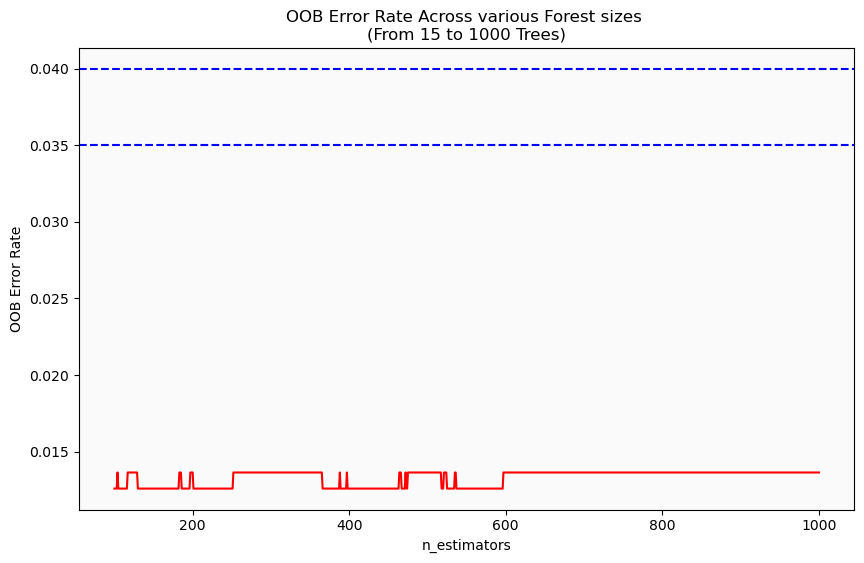

In [330]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In [331]:
print('OOB Error rate for 650 trees is: %0.5f'%oob_series[650])

OOB Error rate for 650 trees is: 0.01364


In [332]:
fit_rf.set_params(n_estimators=650,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=650,
                       random_state=40)

In [333]:

model_rf = fit_rf.fit(x_train,y_train)

In [334]:
y_pred_rf = fit_rf.predict(x_test)
print(y_pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [335]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

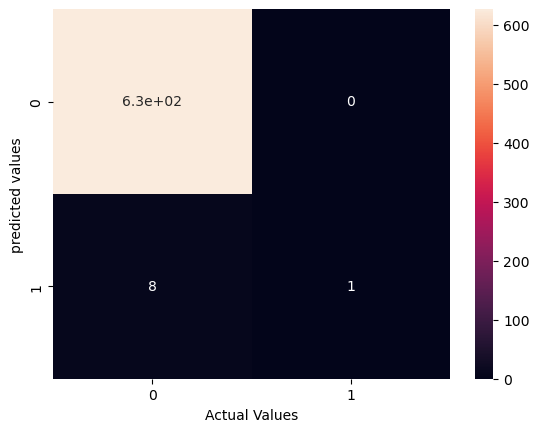

In [336]:
# confusion matrix
con_matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(con_matrix_rf,annot = True)
plt.xlabel('Actual Values')
plt.ylabel('predicted values')
plt.show()

In [337]:
accuracy_rf = model_rf.score(x_test,y_test)
accuracy_rf

0.9874213836477987

In [338]:
precision_rf = metrics.precision_score(y_test,y_pred_rf)
precision_rf

1.0

In [339]:
recall_rf = metrics.recall_score(y_test,y_pred_rf)
recall_rf

0.1111111111111111

In [340]:
#AUC
predictions_proba = model_rf.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)


In [341]:
auc_rf = metrics.auc(fpr2,tpr2)
auc_rf

0.8799397483608009

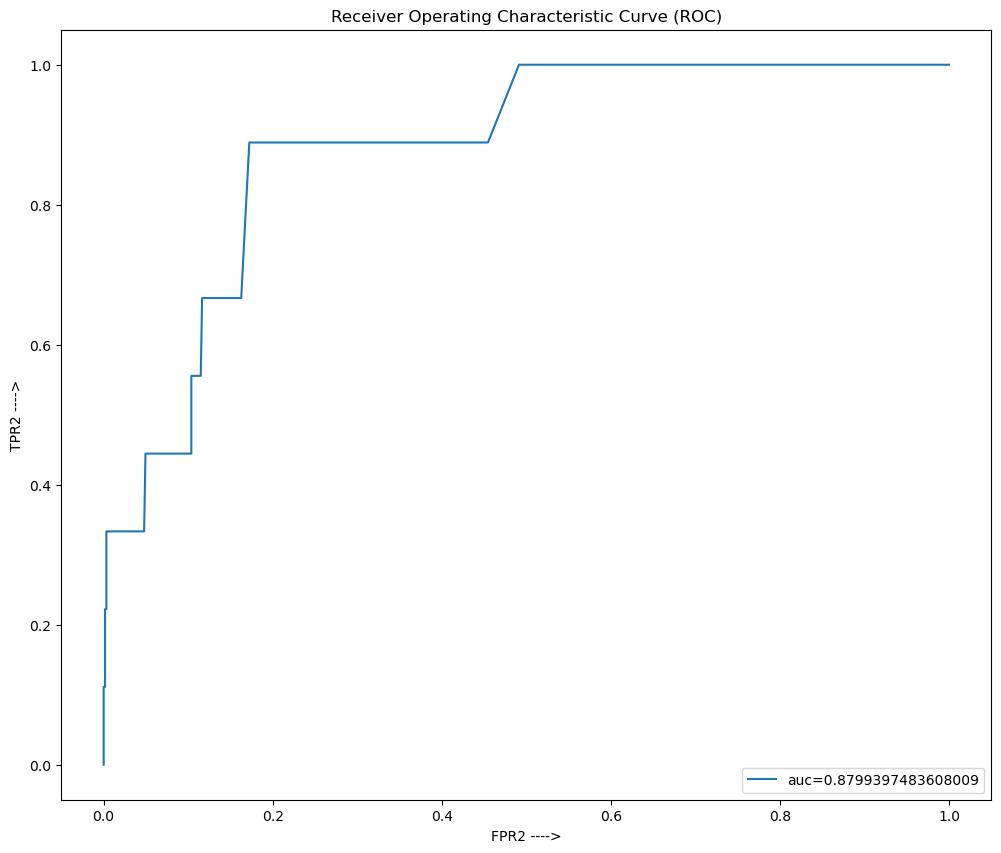

In [342]:
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr2,tpr2,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR2 ---->")
plt.ylabel("TPR2 ---->")
plt.show()

In [343]:
#Model 5 : Grdient Booster 
fit_gb = GradientBoostingClassifier(random_state = 40 )

In [344]:
# Hyper parameter tuning 
np.random.seed(40)
start = time.time()
parameters={

    'n_estimators' :[50,100,500],
    'learning_rate' : [0.001,0.1,1],
    'criterion' : ['friedman_mse','squared_error'],
    'max_features' : ['sqrt','log2'],
    'loss' : ['log_logs','exponential'],
    'max_depth':[2,3,4,5]
}

cv_gb = GridSearchCV(fit_gb,param_grid = parameters,cv = 10,n_jobs = 3)
cv_gb.fit(x_train,y_train)

print(cv_gb.best_params_)
end = time.time()
print("time taken to execute: %0.2f"%(end-start))
    

{'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}
time taken to execute: 140.41


In [345]:
model_gb = fit_gb.set_params(
    n_estimators =100,
    criterion = 'friedman_mse',
    learning_rate = 1 ,
    max_features = 'sqrt',
    loss = 'exponential',
    max_depth = 3)




In [346]:
fit_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential',
                           max_features='sqrt', random_state=40)

In [347]:
y_pred_gb = fit_gb.predict(x_test)

In [348]:
y_pred_gb


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [349]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

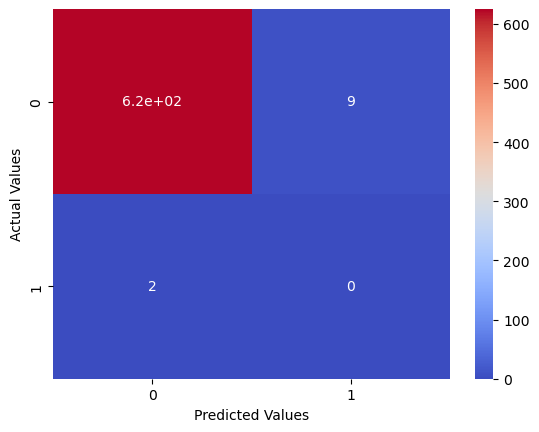

In [350]:
# Performance Metrics
conf_matrix = confusion_matrix(y_pred_gb,y_test)
sns.heatmap(conf_matrix , cmap = 'coolwarm', annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [351]:
acuraccy_gb = model_gb.score(x_test,y_test)
acuraccy_gb

0.9827044025157232

In [352]:
precision_gb = metrics.precision_score(y_pred_gb,y_test)
precision_gb

0.0

In [353]:
recall_gb = metrics.recall_score(y_pred_gb,y_test)
recall_gb

0.0

In [354]:
#Error Rate 
test_error_rate_gb = 1 - acuraccy_gb
test_error_rate_gb

0.01729559748427678

In [355]:
#AUC 
predictions_proba = model_gb.predict_proba(x_test)[:,1]
fpr3,tpr3,_=roc_curve(y_test,predictions_proba,pos_label = 1)
auc_gb = metrics.auc(fpr3,tpr3)

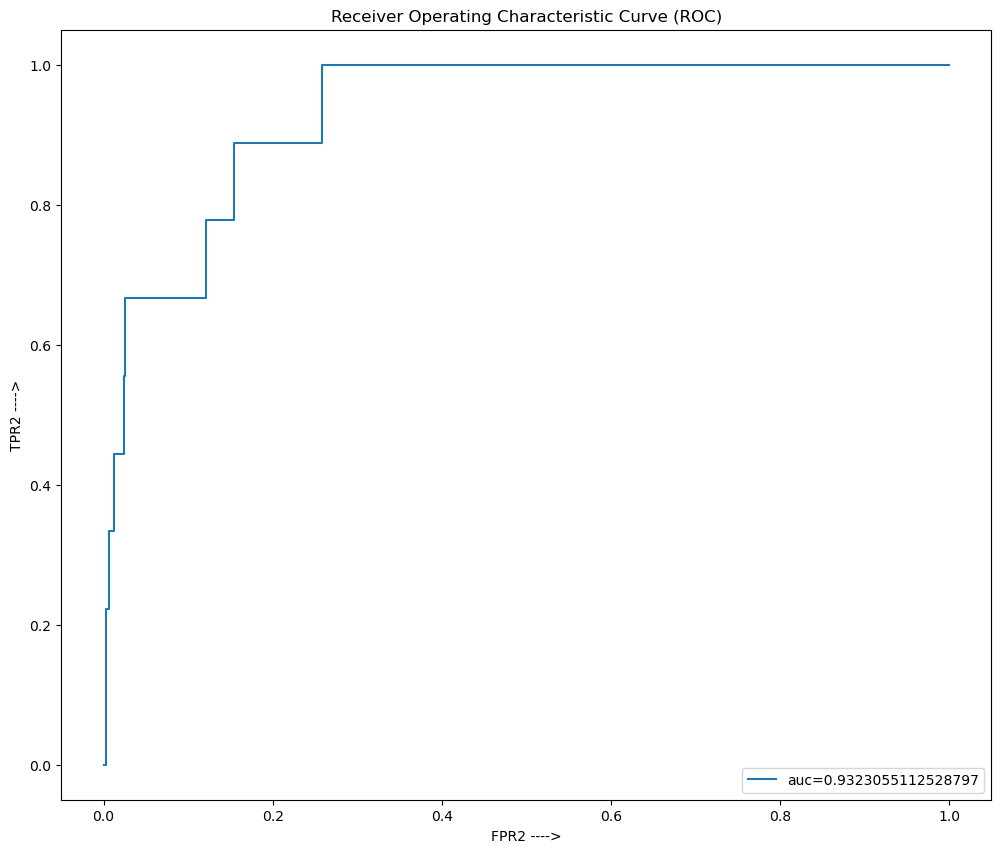

In [356]:
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr3,tpr3,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR2 ---->")
plt.ylabel("TPR2 ---->")
plt.show()

In [357]:
# model 6 SVM

C_range = list(np.arange(0.1,2,0.1))
acc_scores = []
for c in C_range:
    svm = SVC(kernel = 'linear',C = c)
    scores = cross_val_score(svm,X,y,cv = 10, scoring = 'accuracy')
    acc_scores.append(scores.mean())
print(acc_scores)


[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9861555608629887, 0.9861555608629887, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9848976992277686, 0.9848976992277686, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787, 0.9855266300453787]


Text(0, 0.5, 'Cross-Validate Accuracy')

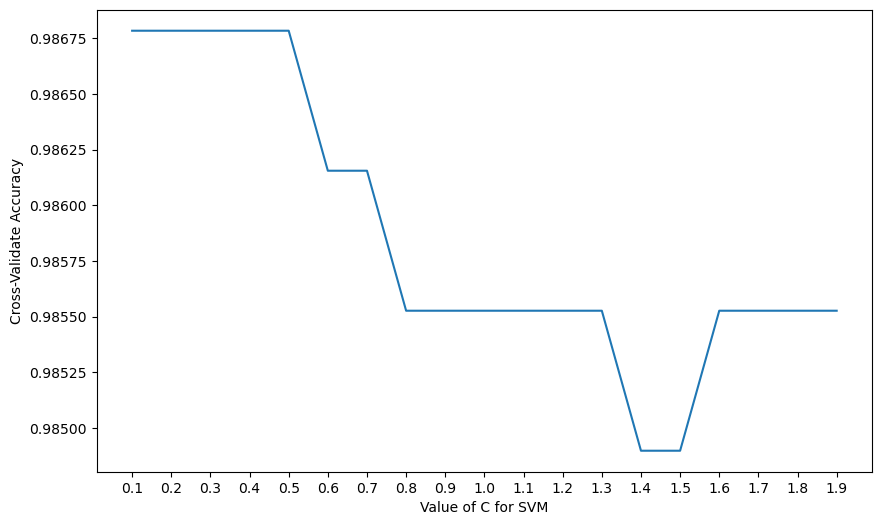

In [358]:
plt.figure(figsize = (10,6))
C_values = list(np.arange(0.1,2,0.1))
plt.plot(C_values,acc_scores)
plt.xticks(np.arange(0.1,2,0.1))
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validate Accuracy')

In [359]:
#Observation the value c can be considered as 0.5

In [360]:
#Optimising the hyper parameter gamma
gamma_range  = [0.0001,0.001,0.01,.1,1,10,100]
acc_score =[]
for g in gamma_range:
    svc = SVC(kernel = 'rbf',gamma = g)
    scores = cross_val_score(svc,X,y,cv =10,scoring = 'accuracy')
    acc_score.append(scores.mean())
print(acc_score)    


[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9861515802881937, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988]


Text(0, 0.5, 'Cross-Validated Accuracy')

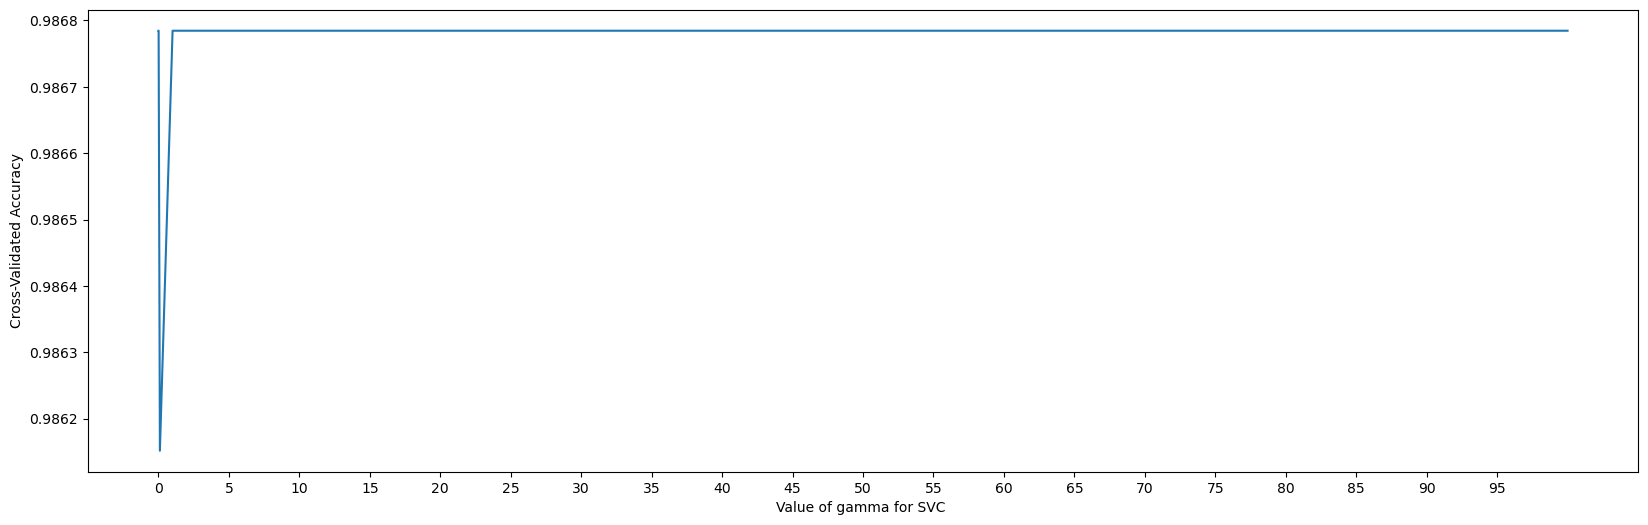

In [361]:
plt.figure(figsize = (20,6))
gamma_range = [0.0001,0.001,0.01,.1,1,10,100]
#,1,10,100
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [362]:
#Observation : degree can be taken as anyvalue since its almost same

In [363]:
# hyper parameter degree
degree_range=[2,3,4,5]
acc_scores = []
for d in degree_range:
    svc =SVC(kernel='rbf',degree= d)
    scores = cross_val_score(svc,X,y,cv= 10,scoring='accuracy')
    acc_scores.append(scores.mean())
print(acc_scores) 

[0.9867844916805988, 0.9867844916805988, 0.9867844916805988, 0.9867844916805988]


Text(0, 0.5, 'Cross validation accuracy')

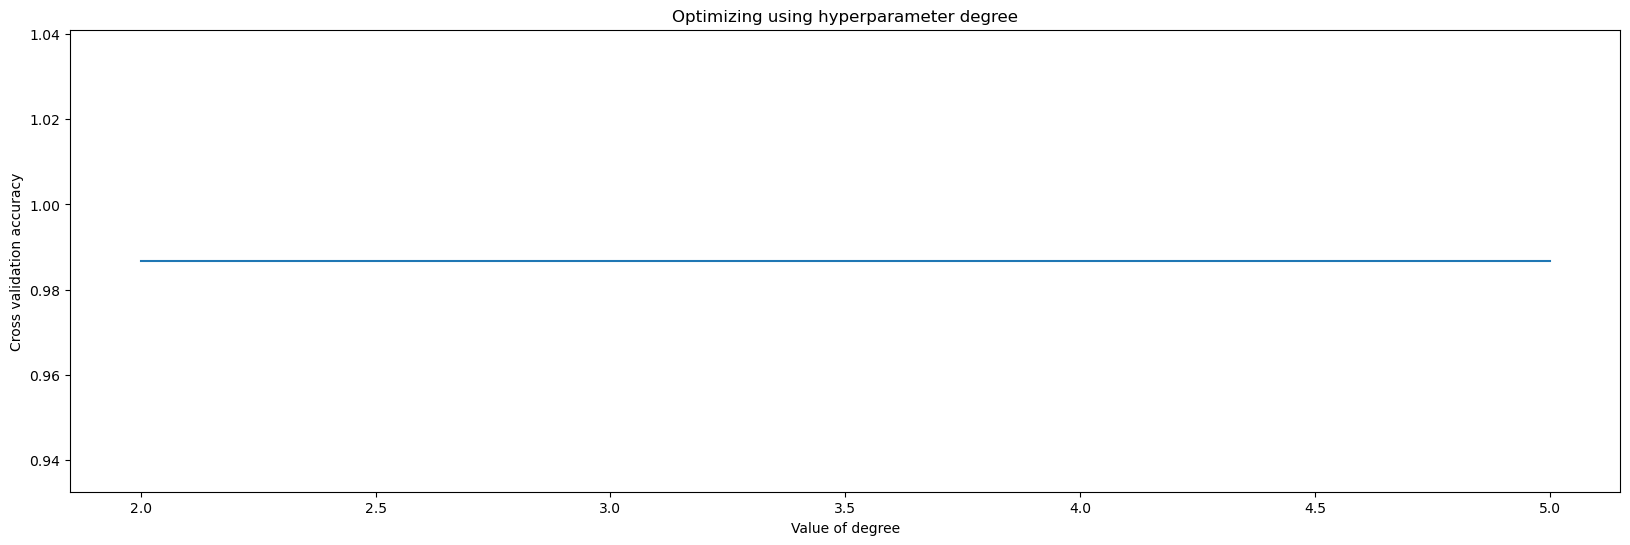

In [364]:
plt.figure(figsize = (20,6))
plt.plot(degree_range,acc_scores)
plt.title("Optimizing using hyperparameter degree")
plt.xlabel("Value of degree")
plt.ylabel("Cross validation accuracy")

In [365]:
#Observation : degree can be taken as anyvalue since its almost same

In [366]:
#Optimizing hyper parameter using GridSearchCV

#tuning the parameters
tuned_parameters = {
    'C' : [0.5],
    'degree' : [2],
    'gamma' : [0.01],
    'kernel' : ['liner','rbf','ploy']
    
}

In [367]:
model_svm = GridSearchCV(svc,tuned_parameters,cv =10,scoring = 'accuracy')
model_svm.fit(x_train,y_train)
print(model_svm.best_score_)

0.9874232456140352


In [368]:
print(model_svm.best_params_)

{'C': 0.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [369]:
#training and evaluating the model with best parameters
svc = SVC(gamma = 0.01 , C = 0.5,degree = 2,kernel = 'rbf')

In [370]:
svc_model = model_svm.fit(x_train,y_train)

In [371]:
y_pred_svc = svc_model.predict(x_test)
y_pred_svc[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [372]:
#Accuracy
accuracy_svc = metrics.accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.9858490566037735

In [373]:
#precision
precision_svc = metrics.precision_score(y_test,y_pred_svc)
precision_svc

0.0

In [374]:
#recall
recall_svc = metrics.recall_score(y_test,y_pred_svc)
recall_svc

0.0

In [375]:
#Confusion matrix
svc_con_matrix = confusion_matrix(y_test,y_pred_svc)
svc_con_matrix

array([[627,   0],
       [  9,   0]], dtype=int64)

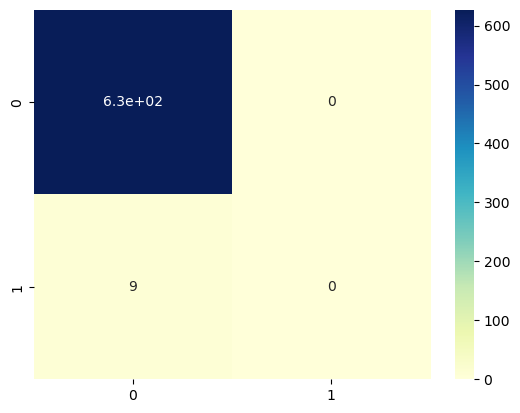

In [376]:
sns.heatmap(svc_con_matrix,annot=True, cmap="YlGnBu")
plt.show()

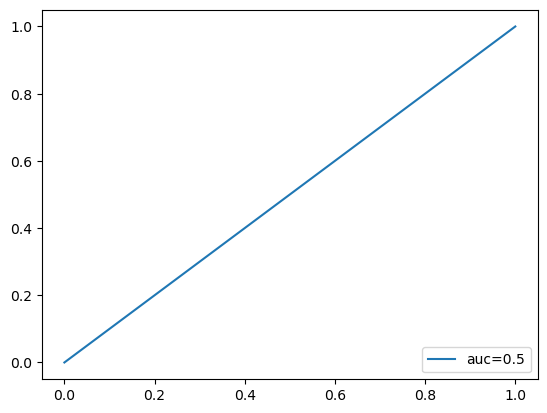

In [377]:
#AUC
fpr,tpr,_ = roc_curve(y_test,y_pred_svc)
auc_svc = roc_auc_score(y_test,y_pred_svc)
plt.plot(fpr,tpr,label = 'auc='+str(auc_svc) )
plt.legend(loc =4)
plt.show()

In [378]:
#Naive bayes algorithm
model_NB = GaussianNB()
model_NB.fit(x_train,y_train)

GaussianNB()

In [379]:
y_pred_NB = model_NB.predict(x_test)
y_pred_NB

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [380]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [381]:
#accuracy
accuracy_GNB = metrics.accuracy_score(y_test,y_pred_NB)
accuracy_GNB

0.6509433962264151

In [382]:
#precision
precision_GNB = metrics.precision_score(y_test,y_pred_NB)
precision_GNB

0.034934497816593885

In [383]:
#recall
recall_GNB = metrics.recall_score(y_test,y_pred_NB)
recall_GNB

0.8888888888888888

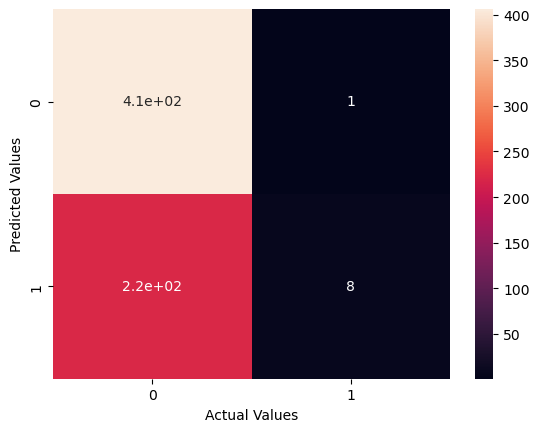

In [494]:
#Confusion matrix
Confustion_matrix_GNB = confusion_matrix(y_pred_NB,y_test)
names = np.unique(y_pred_NB)
sns.heatmap(Confustion_matrix_GNB,annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [498]:
#Classification report
print(metrics.classification_report(y_pred_NB,y_test,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       407
           1       0.89      0.03      0.07       229

    accuracy                           0.65       636
   macro avg       0.77      0.52      0.43       636
weighted avg       0.73      0.65      0.53       636



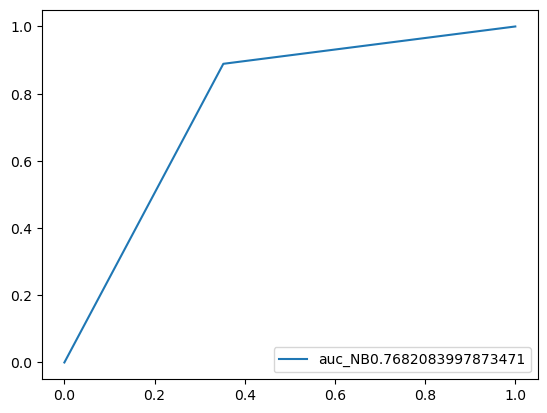

In [504]:
#AUC plot
fpr,tpr,_ = roc_curve(y_test,y_pred_NB)
auc_NB = roc_auc_score(y_test,y_pred_NB)
plt.plot(fpr,tpr,label = 'auc_NB'+str(auc_NB))
plt.legend(loc = 4)
plt.show()